# Ways to solve: 2nd order ODE 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use(['science', 'notebook', 'grid'])

Solve the following 2nd order ODE:
$$
\ddot{x} + 3 \dot{x} + 2x = 0 
$$

at IC as:
$x(0) = 2$ and $\dot{x}(0) = -3$

$\textbf{Analytic solution}$

* The solution is $x = e^{\lambda t}$ where the values of $\lambda$ can be obtaiined by plugging it back to the above equation 
* The characteristic polynomical is $ \lambda^{2} + 3 \lambda + 2 = 0$, whose solutions are $\lambda = -1, -2$
* Hence the proper solution to the provided 2nd order ODE is: $x(t) = e^{-t} + e^{-2t} $

$\textbf{Numeric solution Procedure}$

* Let us suppose, $\dot{x} = v$
the provided above exquations can be written as two coupled 1st order ODE as follows:

$$
\dot{x} = v
$$
$$
\dot{v} = -3v -2x
$$

* Now writing above decomposed two coupled 1srs order ODE in matric representaiton as (reminder, this representaiton is equivalent to the above provided 2nd order ODE):

$$
\frac{d}{dt} \begin{bmatrix} x\\ v \end{bmatrix} = A \begin{bmatrix} x\\ v \end{bmatrix}
$$

where, 
$$
A = \begin{bmatrix} 0 & 1\\ -2 & -3 \end{bmatrix}
$$

To write it in compact form, let us suppose,
$$
X = \begin{bmatrix} x\\ v \end{bmatrix}
$$
then the matrix equation is written as:
$$
\frac{d X}{dt}  = A X
$$


* Now the eigen values of the transformation matrix $A$ are the solutions of the characterisitic polynomicals, or in another word are the values of $\lambda$


In [8]:
#define the matrix A from above example
A = np.array([[0,1], [-2, -3]])

#eighen values of A should be the roots of characterisitics equations!
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)


[-1. -2.]


$\textbf {Numerical Integrators:}$
We can numerically compute/integrate the path of the dynamical system. There are several numerical integrators schemes to obtain the trajectory of the dynamic. They are:

* Forward Euler
* Backward Euler
* Runge-Kutta rule

Every schemes has the local and global error attached to it, hence it has to be choosen carefully. In any case, the Runge-Kutte is the most utilized scheme.

### Using Runge Kutta 45 (RK45)

In [12]:
#define the time base
dt = 0.01 #time step
T = 10  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n) # t = np.linspace(0,10,1000)

#define intitial value
X0 = [2, -3]

#analytic solution equation
x = np.exp(-t) + np.exp(-2*t) # check the power of exponents are eigen values of matrix A

#define the matrix
A = np.array([[0,1], [-2, -3]])

# defining a dummy function A dot product y as
def linear_ode(t,X): # this function represent the right hand side of vector field
    return A @ X


#the built in fucntion takes the function handle, time span, initial value, and whihc time to evaluated on
linear_ode_solution = solve_ivp(linear_ode, (0,10), X0, t_eval=t)
X = linear_ode_solution.y

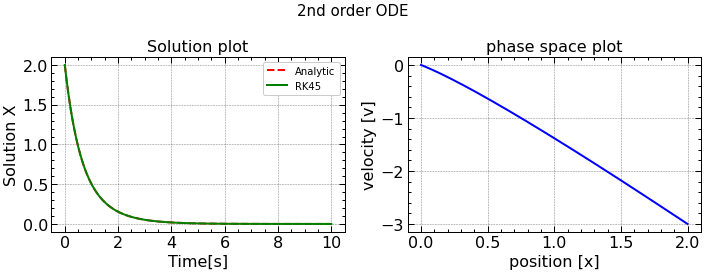

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t,x,'r--')
ax.plot(t, X[0, :], 'g')
ax.set_xlabel("Time[s]")
ax.set_ylabel('Solution X')
ax.set_title('Solution plot')
ax.legend(['Analytic', 'RK45'], fontsize=10)


ax = axes[1]
ax.plot(X[0, :], X[1, :], 'b')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
ax.set_title('phase space plot')
#ax.legend()

fig.tight_layout()
fig.suptitle('2nd order ODE', y=1.1, fontsize=15)
plt.show()

## Damped Harmonic Oscillator

Let us suppose a mass $(m)$ is horizontally attached to the wall with the spring constant $(k)$. Then the equation of motion is defined by following equation:

$$
\ddot{x} + \zeta \dot{x} + \omega^{2} x = 0
$$
where $\zeta = d / m$ and  $\omega^{2} = k/m$ 
with $d$ being damping and $k$ being spring constant

Let us suppose,
$$
\dot{x} = v
$$
$$
\dot{v} = -\omega^{2}x - \zeta v
$$
Then the equation can be written as two 1st oder ODEs in matrix representation as:
$$
\frac{d}{dt} \begin{bmatrix} x\\ v \end{bmatrix} =  \begin{bmatrix} 0 & 1\\ -\omega^{2} & -\zeta \end{bmatrix} 
\begin{bmatrix} x\\ v \end{bmatrix}
$$

$$
\dot{X}  = A X
$$

In [27]:
# Defining constants 
w = 2 * np.pi #natural frequency
d = 0.25 #damping ratio, where zeta = - 2*d*w

#defining the matrix for spring mass damper system
A = np.array([[0,1], [-w**2, -2*d*w]]) # dot{x} = Ax

dt = 0.01 #time step
T = 10  #amount of time to integrate
n = int(T/dt)
t = np.linspace(0,T,n)

X0 = [2, 0] # initial conditions (arbitary)

### Forward Euler method

$$
x_{k + 1} = x_{k} + A x_{k} \delta t
$$

In [29]:
X_F = np.zeros((2,n))
X_F[:,0] = X0 # assigning the initial value to first coloumn

for k in range(n-1):
    X_F[:,k+1] = (np.eye(2) + dt * A) @ X_F[:,k] # this is exactly the formula written above

### 4th order Runga Kutta

In [30]:
#compute the better integral using the built-in python code
#4th order Runge Kutta

def linear_old(t,X): # t is defult time, x is supposition for state vector
    return A @ X # A is matrix & x is state vector
# @ is symbol for matrix vector product

linear_ode_solution = solve_ivp(linear_ode, (0, T), X0, t_eval=t)
X_RK = linear_ode_solution.y


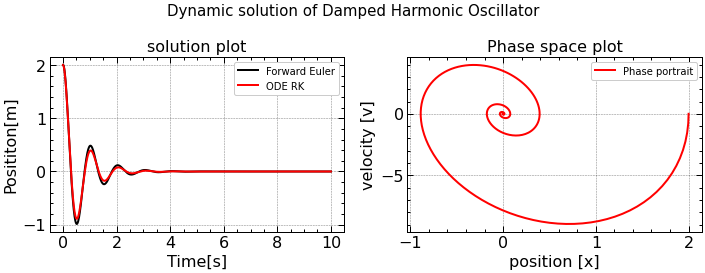

In [32]:
'''
For individual plots

# solution plot
plt.figure()
plt.plot(t,xF[0,:], 'k') # plotting forward Euler
plt.plot(t, x_RK[0, :], 'r')
plt.xlabel('Time[s]')
plt.ylabel('Posititon[m]')
plt.legend(['Forward Euler', 'ODE RK'])
plt.grid(True)

#Phase space plot
plt.figure()
plt.plot(x_RK[0, :], x_RK[1, :], 'r')
plt.xlabel('position [x]')
plt.ylabel('velocity [v]')
plt.legend(['Phase poterate'])
plt.grid(True)

'''

fig, axes = plt.subplots(1, 2, figsize=(10,3.5))

ax = axes[0]
ax.plot(t,X_F[0,:], 'k') 
ax.plot(t, X_RK[0, :], 'r')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Posititon[m]')
ax.set_title('solution plot')
ax.legend(['Forward Euler', 'ODE RK'], fontsize=10)

ax = axes[1]
ax.plot(X_RK[0, :], X_RK[1, :], 'r')
ax.set_xlabel('position [x]')
ax.set_ylabel('velocity [v]')
ax.set_title('Phase space plot')
plt.legend(['Phase portrait'], fontsize=10)

fig.tight_layout()
fig.suptitle('Dynamic solution of Damped Harmonic Oscillator', y=1.1, fontsize=15)
plt.show()


$\textbf{Note:}$

* The phase potrait is a stable spiral. This means the eigen value ($\lambda$) of matrix A has negative real part and non-zero imaginary part.


$\textbf{Things to do:}$

* We can change the integration time step (dt), for example, make it small and check if the solution as obtained by FE and RK. 
* We can also change the damping ratio (d), it changes the lambda. For eg: higher damping ratio can make the position go to rest immediately, critically damped.

